In [343]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

1. Reading the dataset using the Pandas library's **read** function and saving it in a variable named **coffe_data**

In [112]:
coffee_data = pd.read_csv("Data/merged_data_cleaned.csv")

2. Calling the variable **coffee_data** in order to show the DataFrame of the set.

In [113]:
coffee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

1. In order to get the number of rows (Observations) and columns (features) I use the **shape** function from the Pandas library.

In [114]:
coffee_data.shape

(1339, 44)

2. From the output we can see that there are **1339 observations** and **44 features**

3. Using the **columns** function from the Pandas library in order to explore the 44 features of the set.

In [115]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

4. Using the **dtypes** will show us all the columns and their datatypes(The dataset is not clean, so the datatypes might not be correct)

In [116]:
coffee_data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

### Categorical:
1. Species
2. Owner
3. Owner 1
4. Country.of.Origin
5. Farm.Name
6. Lot.Number
7. Mill
8. ICO.Number
9. Company
10. Altitude()
11. Region
12. Producer
13. In country partner
14. Harvest year
15. Grading date
16. Bag weight
17. Variety
18. Processing method
19. Color
20. Expiration
21. Certification body
22. Certification address
23. Certification contact
24. Unit of measurement
### Numerical:
1. Index
1. Number of bags
3. Aroma
4. Flavour
5. Aftertaste
6. Acidity
7. Body
8. Balance
9. Uniformity
10. Clean cup
11. Sweetness
12. Cupper points
13. Total cup points
14. Moisture
15. Category one defects
16. Quakers
17. Category two defects
18. Altitude low meters
19. Altitude high meters
20. Altitude mean meters

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

1. Defining a function to convert the column names to snake_case (by making every letter lowercase and replacing the spaces or periods(dots) in the names with underscores.

In [117]:
 """
    Convert a column name to snake_case.

    This function takes a column name as input and converts it to snake_case format.
    Snake_case format means all characters are lowercase and spaces or periods are replaced with underscores.

    Parameters:
    column_name (str): The name of the column to be converted.

    Returns:
    str: The converted column name in snake_case format.
 """
def convert_to_snake_case(column_name):
    return column_name.lower().replace('.', '_').replace(' ', '_')

2. Using **.lower** will make every letter lowercase.
3. Using **.replace()** replaces a specified letter,symbol or phrase with another specified one.
4. The function returns the converted column names
5. Renaming the columns of the original dataset coffee_data

In [118]:
coffee_data.rename(columns=lambda col: convert_to_snake_case(col))

,unnamed:_0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


6. Using the **.rename** method creates a new DataFrame with renamed columns, based on the provided parameters. It takes the column names as an input and it applies the conversion function to every single column name in the dataset, and by this way renaming every column name and creating a new dataframe with the new converted column names.
7. Saving the new DataFrame in a new variable, in order to preserve the original one in case it's needed

In [119]:
coffee_data_converted_names = coffee_data.rename(columns=lambda col: convert_to_snake_case(col))

8. Both DataFrames can now be called and used and no information is lost.

In [120]:
coffee_data # ORIGINAL DATAFRAME

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [121]:
coffee_data_converted_names # DATAFRAME WITH CONVERTED COLUMN NAMES

,unnamed:_0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

1. Using **.unique()** to show all the values of the bag_weight column in order to see what is up with the values

In [122]:
coffee_data_converted_names.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

2. The bag_weight column contains various weights in different formats, such as:
- Values in different units ('kg' or 'lbs')
- Mixed unit format (for example "1 kg,lbs")
- Values with missing units(for example "1")
- Values which look way bigger than the rest of the values
- Values that are 0 in kg or in lbs("0 kg" or "0 lbs")

3. Using value_counts() to see the number of occurences of different values in order to decide what to do with the units(for example to standardize the units by converting them to one unit) and to see the occurance of anomaly values to decide whether to keep them and convert them 

In [123]:
coffee_data_converted_names.bag_weight.value_counts()

bag_weight
1 kg        331
60 kg       256
69 kg       200
70 kg       156
2 kg        122
100 lbs      59
30 kg        29
5 lbs        23
6            19
20 kg        14
50 kg        14
10 kg        11
59 kg        10
1 lbs         8
1             7
3 lbs         7
5 kg          7
2 lbs         5
4 lbs         4
80 kg         4
18975 kg      4
0 lbs         3
46 kg         3
29 kg         2
9000 kg       2
25 kg         2
66 kg         2
35 kg         2
12000 kg      2
40 kg         2
6 kg          2
19200 kg      2
15 kg         2
13800 kg      1
100 kg        1
55 lbs        1
4 kg          1
67 kg         1
350 kg        1
3 kg          1
8 kg          1
80 lbs        1
24 kg         1
1500 kg       1
2 kg,lbs      1
0 kg          1
660 kg        1
1218 kg       1
2             1
18 kg         1
150 lbs       1
18000 kg      1
1 kg,lbs      1
132 lbs       1
34 kg         1
130 lbs       1
Name: count, dtype: int64

4. Let's check which unit occurs more often (kg's or lbs) by finding out whether the value contains a partial string that indicates kgs or lbs and sum their total number.

In [124]:
def count_units(df, column_name):
    """
    Count the occurrences of 'kg' and 'lbs' in the specified column of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to count units in.

    Returns:
    tuple: A tuple containing the counts of 'kg' and 'lbs' entries.
    """
    kg_count = df[column_name].str.contains('kg', case=False).sum()
    lbs_count = df[column_name].str.contains('lbs', case=False).sum()
    
    return kg_count, lbs_count
    
kg_count, lbs_count = count_units(coffee_data_converted_names, 'bag_weight')
print("Number of 'kg' entries:", kg_count)
print("Number of 'lbs' entries:", lbs_count)

Number of 'kg' entries: 1198
Number of 'lbs' entries: 116


5. As it can be seen, most entries are in kilograms, so we could convert the lbs into kg's to standardize it. So lbs will be converted into kg's.
6. The values without units we could possibly assume that they are meant to be in kg's as most values are in kg's.
7. The mixed unit entries are only 2 and we could assume that they are in kg.
8. The entries with 0 kg and 0lbs give insufficient information and make up for 4 out of 1339 entries so we could remove those. One thing could be that the package is lighter than 1 lbs or 1 kgs and it's just given the value of 0 lbs but this doesnt give much info about it. Other it could be that they forgot the input it. But by removing them we will lose 4 rows that otherwise contain information so we could assume to put a value that represents the mean of the weight.
9. Let's begin by normalizing the mixed values to kg

In [125]:
def remove_mixed_units(value):
    """
    Remove ',lbs' part from mixed unit values, keeping only the 'kg' part.
    
    Parameters:
    value (str): The value to be processed.
    
    Returns:
    str: The processed value with only the 'kg' part.
    """
    if ',lbs' in value:
        return value.split(',')[0]  # Keep only the part before ',lbs'
    return value  # Return the value as it is if it's not a mixed unit

coffee_data_converted_names['bag_weight'] = coffee_data_converted_names['bag_weight'].astype(str).apply(remove_mixed_units)

In [126]:
coffee_data_converted_names.bag_weight.value_counts()

bag_weight
1 kg        332
60 kg       256
69 kg       200
70 kg       156
2 kg        123
100 lbs      59
30 kg        29
5 lbs        23
6            19
50 kg        14
20 kg        14
10 kg        11
59 kg        10
1 lbs         8
3 lbs         7
5 kg          7
1             7
2 lbs         5
18975 kg      4
80 kg         4
4 lbs         4
46 kg         3
0 lbs         3
25 kg         2
9000 kg       2
29 kg         2
66 kg         2
35 kg         2
40 kg         2
12000 kg      2
19200 kg      2
6 kg          2
15 kg         2
18000 kg      1
24 kg         1
100 kg        1
55 lbs        1
4 kg          1
67 kg         1
350 kg        1
3 kg          1
8 kg          1
80 lbs        1
1500 kg       1
150 lbs       1
13800 kg      1
0 kg          1
132 lbs       1
1218 kg       1
2             1
660 kg        1
18 kg         1
34 kg         1
130 lbs       1
Name: count, dtype: int64

10. Now let's convert all the units to kg and assign the values without units to kg and rename the column to specify that this is bag weight in kilograms so that we can only have the number, this would make operations easier. We still haven't fixed the 0 kg problem, but i will try to normalize it first, as the big values could be outliers and really affect the mean.

In [127]:
def convert_to_kg(value):
    """
    Convert all weights to kg.
    
    Parameters:
    value (str): The value to be processed.
    
    Returns:
    float: The processed value in kg rounded to 2 decimal places.
    """
    if 'lbs' in value:
        lbs_value = float(value.replace(' lbs', ''))
        kg_value = lbs_value * 0.453592
        return round(kg_value, 2)
    return round(float(value.replace(' kg', '')), 2)

coffee_data_converted_names.loc[:, 'bag_weight'] = coffee_data_converted_names['bag_weight'].astype(str).apply(convert_to_kg)
coffee_data_cleaned_renamed_column = coffee_data_converted_names.rename(columns={'bag_weight': 'bag_weight_kg'}, inplace= False)


In [128]:
coffee_data_cleaned_renamed_column.bag_weight_kg.value_counts()

bag_weight_kg
1.0        339
60.0       256
69.0       200
70.0       156
2.0        124
45.36       59
30.0        29
2.27        23
6.0         21
50.0        14
20.0        14
10.0        11
59.0        10
0.45         8
1.36         7
5.0          7
0.91         5
1.81         4
18975.0      4
80.0         4
0.0          4
46.0         3
29.0         2
19200.0      2
12000.0      2
35.0         2
66.0         2
40.0         2
25.0         2
15.0         2
9000.0       2
8.0          1
3.0          1
350.0        1
24.95        1
67.0         1
4.0          1
24.0         1
100.0        1
36.29        1
660.0        1
1500.0       1
13800.0      1
1218.0       1
34.0         1
18.0         1
68.04        1
18000.0      1
59.87        1
58.97        1
Name: count, dtype: int64

11. The entries with large values like 19200kg and so on are likely outliers, or these could be the total weight of of the coffe bags(aggregated data). For example 19200 kg in bag weight but 320 bags, if we devide it could turn out that 1 bag is 60kg which is what most bags weigh.All bag weights after dividing the value with the number of bags is around 60 to 69 kg and one 6kg bag(but this is after i personally went thorugh the data manually and checked all the values and number of bags and did the math myself, the set is small and this is not optimal in dataset that is big). So that value could be the total weight of all bags. Normalizing them by dividing the value of the weight by the number of bags or removing the data are the two options. But in any case these big values really have an impact on the analysis and it's not logical for most to weigh under 100kg and others to weigh tons. One approach wouldbe to find the mean/mode/median of the number of bags and divide by that. But looking at the description of the number of bags, the mean could be affected, the median is the most optimal in this situation. Another one is to divide the suspected of me aggregated data by it's own number of bags. The dataset is small so this wouldn't be a problem. I will try and sort every single one, as i suspect aggregated data.

In [129]:
coffee_data_cleaned_renamed_column.number_of_bags.describe()

count    1339.000000
mean      154.182972
std       129.987162
min         0.000000
25%        14.000000
50%       175.000000
75%       275.000000
max      1062.000000
Name: number_of_bags, dtype: float64

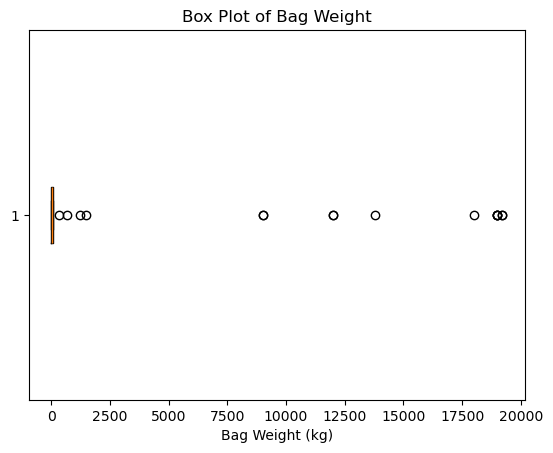

In [130]:
plt.boxplot(coffee_data_cleaned_renamed_column['bag_weight_kg'], vert=False)
plt.title('Box Plot of Bag Weight')
plt.xlabel('Bag Weight (kg)')
plt.show()

In [141]:
def normalize_large_values(df, weight_column, bags_column, threshold=349):
    """
    Normalize values in the specified weight column that are above a certain threshold by dividing them
    by their corresponding number of bags from the bags column.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    weight_column (str): The name of the weight column to normalize.
    bags_column (str): The name of the column with the number of bags.
    threshold (float): The threshold above which values are considered large.
    
    Returns:
    pd.DataFrame: The dataframe with normalized values in the specified weight column.
    """
    # Create a mask for values above the threshold
    mask = df[weight_column] > threshold
    
    # Normalize the values above the threshold
    df.loc[mask, weight_column] = df.loc[mask, weight_column] / df.loc[mask, bags_column]
    
    return df

coffee_data_normalized_bag_weight = normalize_large_values(coffee_data_cleaned_renamed_column, 'bag_weight_kg', 'number_of_bags')


In [142]:
coffee_data_normalized_bag_weight.bag_weight_kg.value_counts()

bag_weight_kg
1.0                   339
60.0                  264
69.0                  205
70.0                  156
2.0                   124
45.36                  59
30.0                   29
2.27                   23
6.0                    22
50.0                   14
20.0                   14
10.0                   11
59.0                   10
0.45                    8
1.36                    7
5.0                     7
0.91                    5
1.81                    4
80.0                    4
0.0                     4
46.0                    3
35.0                    2
40.0                    2
25.0                    2
29.0                    2
66.0                    2
15.0                    2
8.0                     1
100.0                   1
24.95                   1
4.0                     1
67.0                    1
1.2727272727272727      1
3.0                     1
60.9                    1
36.29                   1
24.0                    1
18.0                    

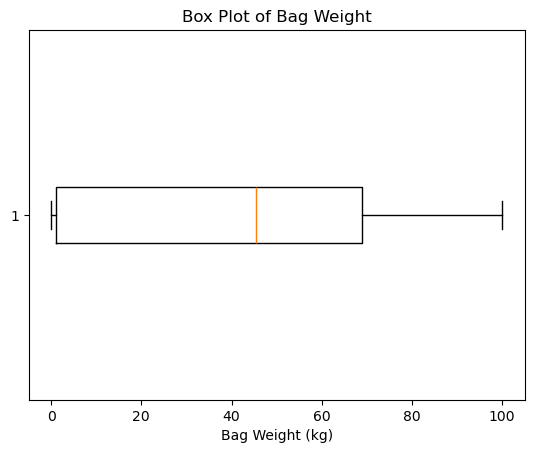

In [137]:
plt.boxplot(coffee_data_normalized_bag_weight['bag_weight_kg'], vert=False)
plt.title('Box Plot of Bag Weight')
plt.xlabel('Bag Weight (kg)')
plt.show()

12. Now it looks normalized and there arent any huge outliers, so we shall find the mean to replace the 0's with

In [139]:
coffee_data_normalized_bag_weight.bag_weight_kg.mean()

36.15283997555842

13. Okay we got around 36 mean, we could replace the 0 values with it, as deleting the whole rows will otherwise lose a lot of potential data that could be used. These wont bias the data a lot, even though 4 out of 1339 is less than 1% so we could also just delete it, but i will try and preserve all the data i could here.

In [255]:
mean_value = 36.0

# Replace 0 values with the mean value
coffee_data_normalized_bag_weight.loc[coffee_data_normalized_bag_weight['bag_weight_kg'] == 0, 'bag_weight_kg'] = mean_value

In [256]:
coffee_data_normalized_bag_weight.bag_weight_kg.value_counts()

bag_weight_kg
1.0                   339
60.0                  264
69.0                  205
70.0                  156
2.0                   124
45.36                  59
30.0                   29
2.27                   23
6.0                    22
50.0                   14
20.0                   14
10.0                   11
59.0                   10
0.45                    8
1.36                    7
5.0                     7
0.91                    5
1.81                    4
80.0                    4
36                      4
46.0                    3
35.0                    2
40.0                    2
25.0                    2
29.0                    2
66.0                    2
15.0                    2
8.0                     1
100.0                   1
24.95                   1
4.0                     1
67.0                    1
1.2727272727272727      1
3.0                     1
60.9                    1
36.29                   1
24.0                    1
18.0                    

14. The column is now all in kg's and its numerical so that its easy to work with, the column name is changed to defy that it's only in kg's. The outlier data and the values with mixed or no units and 0 values were taken care of.

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

1. Let's see what are the values in the harvest year column and try to decide what we should do

In [424]:
coffee_data_normalized_bag_weight.harvest_year.value_counts(dropna = False)

harvest_year
2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
NaN      61
2011     36
2010     26
2009     20
2008      2
2018      1
Name: count, dtype: int64

2. There are many values that are just a single year so i think it's gonna be best to normalize them all to one year rather than year range
3. Some are value ranges (2013/2014, 2009 - 2010, 08/09 ) with these we could use the first year of it
4. The ones with T(4t,3T) we can assume are quarters of a year 4t/2010 means last quarter of 2010 and that we can also take as 2010
5. Mixed string and year (Fall 2009) we can also just take the year
6. The ones who don't have a year NaN or just plain strings like January through April make for 57 out of 1339 rows, around 4% of the data, removing them wouldn't be that much of an impact, but it aint small aswell. Leaving them as NaN's will mean the datatype stays as float and it doesn't give us any info. Replacing the NaN values with mean or median values here will be risky as the proportion of the NaN's is not small. So i might just drop them as a whole.
7. We will extract the years from all of them using re(regular expressions) module. And will assign all others as NaN

In [425]:
def extract_year(year):
    """
    Extracts the year from a given Harvest Year string.

    This function handles various formats of the Harvest Year such as:
    - Standard four-digit years (e.g., "2012")
    - Year ranges (e.g., "2013/2014", "2017 / 2018", "2009-2010", "2009 - 2010")
    - Quarters and trimesters (e.g., "4T/10", "4T/2010")
    - Specific string-year formats (e.g., "March 2010", "08/09 crop")
    - Complex string formats containing a year (e.g., "Spring 2011 in Colombia.", "23 July 2010", "Sept 2009 - April 2010")

    Parameters:
    year (str): The Harvest Year string to be processed.

    Returns:
    str: The extracted year or NaN if the year cannot be determined.
    """
    if pd.isnull(year):
        return np.nan
    
    year = str(year).strip()
    
    # Handle specific known cases
    specific_cases = {
        '08/09 crop': '2008',
        '4T72010': '2010',
        '4t/2010': '2010'
    }
    if year in specific_cases:
        return specific_cases[year]

    # Extract standard four-digit years
    years = re.findall(r'\b\d{4}\b', year) #: Matches any four-digit number that stands alone (word boundary \b on both sides).
    if years:
        return years[0]

    # Handle year ranges and quarters/trimesters
    year_match = re.search(r'(\d{4})[\s/-]*\d{2,4}', year) # (\d{4})[\s/-]*\d{2,4}: Matches a four-digit year followed by optional spaces (\s*) and a delimiter (/ or -), followed by another set of 2 to 4 digits.
    if year_match:
        return year_match.group(1)

    # Fallback: Extract any remaining year-like patterns
    fallback_year = re.search(r'\b\d{4}\b', year)
    if fallback_year:
        return fallback_year.group(0)
    
    return np.nan

coffee_data_harvest = coffee_data_normalized_bag_weight['harvest_year'] = coffee_data_normalized_bag_weight['harvest_year'].apply(extract_year)


In [426]:
coffee_data_harvest.value_counts(dropna = False) # Seeing what we got

harvest_year
2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
NaN      61
2011     36
2010     26
2009     20
2008      2
2018      1
Name: count, dtype: int64

8. Now I will drop all NaN values and rows as the chance of wrong assumptions in imputing mean values will actually have more effect on the data than just dropping it.

In [427]:
coffee_data_cleaned_harvest = coffee_data_normalized_bag_weight.dropna(subset=['harvest_year']) 

In [428]:
coffee_data_cleaned_harvest.harvest_year.value_counts() # Seeing what we got left after removing NaN

harvest_year
2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
2011     36
2010     26
2009     20
2008      2
2018      1
Name: count, dtype: int64

9. Now all years are normalized and there arent any non informative values
10. Let's now explore the expiration dates and the grading dates to know how to proceed with their transformation to dates.

In [429]:
coffee_data_cleaned_harvest.grading_date.value_counts()

grading_date
July 11th, 2012         25
December 26th, 2013     24
June 6th, 2012          19
August 30th, 2012       18
July 26th, 2012         15
                        ..
January 21st, 2013       1
August 8th, 2017         1
April 4th, 2016          1
September 19th, 2017     1
December 23rd, 2014      1
Name: count, Length: 537, dtype: int64

In [318]:
coffee_data_cleaned_harvest.expiration.value_counts()

expiration
December 26th, 2014     25
July 11th, 2013         25
June 6th, 2013          19
August 30th, 2013       18
July 26th, 2013         15
                        ..
January 21st, 2014       1
August 8th, 2018         1
April 4th, 2017          1
September 19th, 2018     1
December 23rd, 2015      1
Name: count, Length: 536, dtype: int64

11. After looking at all of it it seems that all the data is in one shape its the same and there ain't no anomalies. So we can now just transform to pd.datetime

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [319]:
coffee_data_cleaned_harvest.country_of_origin.value_counts(dropna = False)

country_of_origin
Mexico                          235
Guatemala                       177
Colombia                        169
Brazil                          127
Taiwan                           75
United States (Hawaii)           54
Honduras                         53
Costa Rica                       49
Ethiopia                         42
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         27
Kenya                            23
Nicaragua                        23
El Salvador                      21
Indonesia                        19
China                            16
India                            14
Malawi                           11
United States                    10
Peru                              9
Vietnam                           8
Myanmar                           8
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos      

1. After looking at the dataset there is 1 row that doesn't contain a country of origin(1198) and in the values_count above we can't see it as I already dropped that row when cleaning the data from NaN values from the Harvest_year column. But after checking in more thorough the producer of the coffee is (racafe & cia) with In Country Partner (Almacafe) and all of that company's coffees country of origin is Colombia. So we can assume that this coffee's country of origin is Colombia.

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [326]:
coffee_data_cleaned_harvest.owner.unique()

array(['metad plc', 'yidnekachew dabessa', 'ji-ae ahn', 'hugo valdivia',
       'ethiopia commodity exchange', 'diamond enterprise plc',
       'mohammed lalo', 'cqi q coffee sample representative',
       'grounds for health admin', 'yunnan coffee exchange',
       'essencecoffee', 'the coffee source inc.', 'roberto licona franco',
       'nucoffee', 'kabum trading company', 'bismarck castro',
       'lin, che-hao krude 林哲豪', 'specialty coffee-korea',
       'francisco a mena', 'hider abamecha', 'daniel magu',
       'kona pacific farmers cooperative', 'itdp international',
       'jacques pereira carneiro', 'jungle estate',
       'great lakes coffee uganda', 'lusso lab', 'afca',
       'juan luis alvarado romero', 'kawacom uganda ltd',
       'exportadora de cafe condor s.a', 'gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export',
       'seid damtew coffee planataion', 'dane loraas',
       'colbran coffeelands, ltd.', 'atlantic specialty coffee',
       '

In [325]:
coffee_data_cleaned_harvest.owner_1.unique()

array(['metad plc', 'Yidnekachew Dabessa', 'Ji-Ae Ahn', 'Hugo Valdivia',
       'Ethiopia Commodity Exchange', 'Diamond Enterprise Plc',
       'Mohammed Lalo', 'CQI Q Coffee Sample Representative',
       'Grounds for Health Admin', 'Yunnan Coffee Exchange',
       'EssenceCoffee', 'The Coffee Source Inc.', 'ROBERTO LICONA FRANCO',
       'NUCOFFEE', 'Kabum Trading company', 'Bismarck Castro',
       'Lin, Che-Hao Krude 林哲豪', 'Specialty Coffee-Korea',
       'Francisco A Mena', 'Hider Abamecha', 'Daniel Magu',
       'Kona Pacific Farmers Cooperative', 'ITDP International',
       'Jacques Pereira Carneiro', 'Jungle Estate',
       'Great Lakes Coffee Uganda', 'LUSSO LAB', 'AFCA',
       'Juan Luis Alvarado Romero', 'Kawacom Uganda LTD',
       'Exportadora de Cafe Condor S.A', 'Gonzalo Hernandez',
       'Ibrahim Hussien Speciality Coffee Producer &Export',
       'SEID DAMTEW COFFEE PLANATAION', 'Dane Loraas',
       'Colbran Coffeelands, Ltd.', 'Atlantic Specialty Coffee',
       '

1. Owner and Owner1 represent the same information, Owner is lower case transformed Owner 1(this means that all the letters are in lower case). So we can try to merge them into one column and get any info that the other column might've had more, but after looking at it there was only 1 different name. After merging we can remove the other column and just use the merged one. I will make a copy for that so that i make sure the original data with both columns is available to explore.

In [348]:

# Make a copy of the DataFrame to avoid the SettingWithCopyWarning
coffee_data_cleaned_harvest_copy = coffee_data_cleaned_harvest.copy()

# Normalize the capitalization of both columns
coffee_data_cleaned_harvest_copy['owner'] = coffee_data_cleaned_harvest_copy['owner'].str.lower().str.strip()
coffee_data_cleaned_harvest_copy['owner_1'] = coffee_data_cleaned_harvest_copy['owner_1'].str.lower().str.strip()

# Combine the columns
coffee_data_cleaned_harvest_copy['owner'] = coffee_data_cleaned_harvest_copy['owner'].combine_first(coffee_data_cleaned_harvest_copy['owner_1'])

# Drop the old column
coffee_data_cleaned_harvest_copy.drop(columns=['owner_1'], inplace=True)

# Check the value counts of the new 'owner' column
owner_value_counts = coffee_data_cleaned_harvest_copy['owner'].value_counts()
print(owner_value_counts)


owner
juan luis alvarado romero         154
racafe & cia s.c.a                 51
exportadora de cafe condor s.a     50
ipanema coffees                    50
cqi taiwan icp cqi台灣合作夥伴           47
                                 ... 
nitin coffee estate                 1
george a. fernandez                 1
andry simarmata                     1
shah plantations                    1
james moore                         1
Name: count, Length: 309, dtype: int64


In [324]:
coffee_data_cleaned_harvest_copy

,unnamed:_0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


2. Now let's see if there is a link between the owner and the producer. I will generate a table that shows the count of each producer for every owner. First by grouping the data into one DataFrame using only the needed columns, then use .size to count the number of occurrences in each group. I will also reset the index to convert the index of the series(resulted from the .size method) into a column and name it "counts"

In [346]:
owner_producer_counts = coffee_data_cleaned_harvest_copy.groupby(['owner', 'producer']).size().reset_index(name='counts')
owner_producer_counts

,owner,producer,counts
0,acacia hills ltd,Acacia Hills Ltd,1
1,adam ciruli ye,Alicia's Farm,1
2,adam ciruli ye,Yunnan Louis Herbs R&D Center,1
3,adriana torres rico quevedo,ADRIANA TORRES RICO QUEVEDO,1
4,afca,Kawacom,1
...,...,...,...
684,yunnan coffee exchange,Yunnan Success Trade Co.Ltd,1
685,zarah zamora perez,Ephemera Traders,1
686,松澤宏樹 koju matsuzawa,"Coffeas Co., Ltd.",3
687,松澤宏樹 koju matsuzawa,Koju Matsuzawa,1


3. I will try to show the top 30 owners with most connections to producers

In [349]:
# Group by owner and producer, and count the occurrences
owner_producer_counts = coffee_data_cleaned_harvest_copy.groupby(['owner', 'producer']).size().reset_index(name='counts')

# Sort the DataFrame by 'counts' in descending order
owner_producer_counts_sorted = owner_producer_counts.sort_values(by='counts', ascending=False)

top_n = 30
owner_producer_counts_sorted.head(top_n)


,owner,producer,counts
566,racafe & cia s.c.a,La Plata,29
299,ipanema coffees,Ipanema Agrícola SA,22
297,ipanema coffees,Ipanema Agricola,12
199,doi tung development project,Doi Tung Development Project,12
298,ipanema coffees,Ipanema Agricola S.A,11
393,juan luis alvarado romero,ROBERTO MONTERROSO,10
353,juan luis alvarado romero,AMILCAR LAPOLA,9
565,racafe & cia s.c.a,LA PLATA,9
111,"ceca, s.a.",Martin Gutierrez,8
351,juan luis alvarado romero,AGROPECUARIA QUIAGRAL,8


4. As it can be seen. The companies do not have a direct link with the producer as one company can be linked with a producer many times(racafe with La Plata), but as it can be seen one company can have many and different producers. Look at juan luis alvarado romero, they have 10 different producers with whom they are linked more than once.Une owner can have many producers and they can link with eachother more than once. In conclusion the connection isn't one on one, the owner cannot be linked with one particular producer 

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

1. We will generate a table that shows the count of each coffee color for every country. ,same method as the tables beforehand.First by grouping the data into one DataFrame using only the needed columns, then use .size to count the number of occurrences in each group. I will also reset the index to convert the index of the series(resulted from the .size method) into a column and name it "counts" 

In [355]:
country_color_counts = coffee_data_cleaned_harvest_copy.groupby(['country_of_origin','color']).size().reset_index(name='count')
country_color_counts

,country_of_origin,color,count
0,Brazil,Blue-Green,14
1,Brazil,Bluish-Green,12
2,Brazil,Green,89
3,Burundi,Green,1
4,China,Green,16
5,Colombia,Blue-Green,8
6,Colombia,Bluish-Green,8
7,Colombia,Green,117
8,Costa Rica,Blue-Green,9
9,Costa Rica,Bluish-Green,9


In [350]:
coffee_data_cleaned_harvest_copy.country_of_origin.value_counts()

country_of_origin
Mexico                          235
Guatemala                       177
Colombia                        169
Brazil                          127
Taiwan                           75
United States (Hawaii)           54
Honduras                         53
Costa Rica                       49
Ethiopia                         42
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         27
Kenya                            23
Nicaragua                        23
El Salvador                      21
Indonesia                        19
China                            16
India                            14
Malawi                           11
United States                    10
Peru                              9
Vietnam                           8
Myanmar                           8
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos      

2. After looking at the results i could see that only Zambia isn't present in the table and after checking it in the data it doesn't have any info about the color so it was counted as NaN.

3. Now let's do that for the Continents. But we don't have a column continents or any data so i will map every country to a continent and create a seperate dataframe for the continents so that i don't alter the original dataset

In [354]:
country_to_continent = {
    'Mexico': 'North America',
    'Guatemala': 'North America',
    'Colombia': 'South America',
    'Brazil': 'South America',
    'Taiwan': 'Asia',
    'United States (Hawaii)': 'North America',
    'Honduras': 'North America',
    'Costa Rica': 'North America',
    'Ethiopia': 'Africa',
    'Tanzania, United Republic Of': 'Africa',
    'Uganda': 'Africa',
    'Thailand': 'Asia',
    'Kenya': 'Africa',
    'Nicaragua': 'North America',
    'El Salvador': 'North America',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'Malawi': 'Africa',
    'United States': 'North America',
    'Peru': 'South America',
    'Vietnam': 'Asia',
    'Myanmar': 'Asia',
    'Haiti': 'North America',
    'Philippines': 'Asia',
    'Panama': 'North America',
    'United States (Puerto Rico)': 'North America',
    'Laos': 'Asia',
    'Ecuador': 'South America',
    'Burundi': 'Africa',
    'Rwanda': 'Africa',
    'Zambia': 'Africa',
    'Mauritius': 'Africa',
    'Cote d\'Ivoire': 'Africa',
    'Papua New Guinea': 'Oceania'
}

# Create a DataFrame with country and color columns
country_color_df = coffee_data_cleaned_harvest_copy[['country_of_origin', 'color']].copy()

# Map the continent information to this new DataFrame
country_color_df['continent'] = country_color_df['country_of_origin'].map(country_to_continent)

# Group by 'continent' and 'color', then count the occurrences
continent_color_counts = country_color_df.groupby(['continent', 'color']).size().reset_index(name='count')
continent_color_counts

,continent,color,count
0,Africa,Blue-Green,5
1,Africa,Bluish-Green,21
2,Africa,Green,100
3,Asia,Blue-Green,24
4,Asia,Bluish-Green,20
5,Asia,Green,105
6,North America,Blue-Green,30
7,North America,Bluish-Green,48
8,North America,Green,444
9,Oceania,Bluish-Green,1


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

1. I will begin by creating a function to calculate the mean and show the range and to plot histogram that will help see the distribution and a box plot will show any outliers and the median. The function will be used on every column in order to be explored 

In [365]:
def analyze_column(dataframe, column_name):
    """
    Analyze the given column: calculate mean, range, and plot histogram and boxplot.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the column to analyze.
    column_name (str): The name of the column to analyze.
    """
    column_mean = dataframe[column_name].mean()
    column_range = dataframe[column_name].max() - dataframe[column_name].min()
    
    print(f"Mean of {column_name.capitalize()}: {column_mean}")
    print(f"Range of {column_name.capitalize()}: {column_range}")
    
    # Plotting histogram for the column
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column_name], bins=20, kde=True)
    plt.title(f'Histogram of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()

    # Plotting boxplot for the column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataframe[column_name])
    plt.title(f'Boxplot of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.show()

2. Let's first begin by exploring the aroma column and seeing what is going on with it.

Mean of Aroma: 7.565876369327074
Range of Aroma: 8.75


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


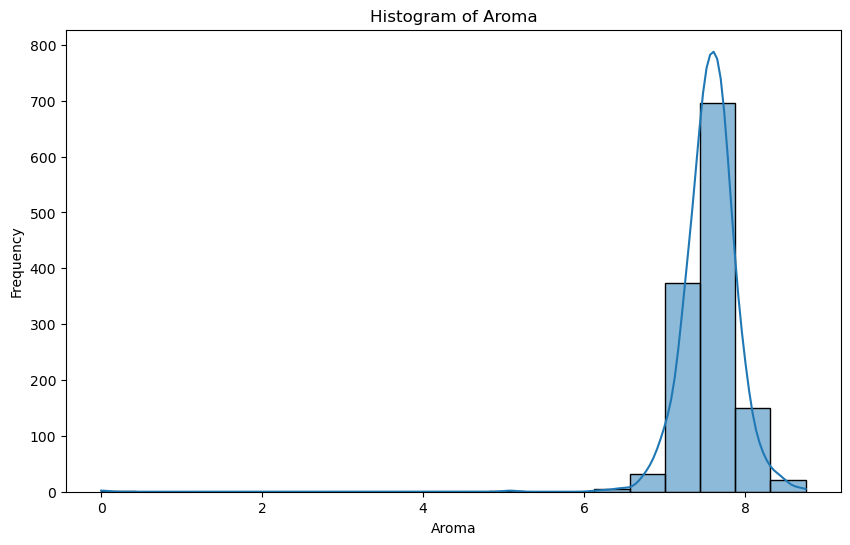

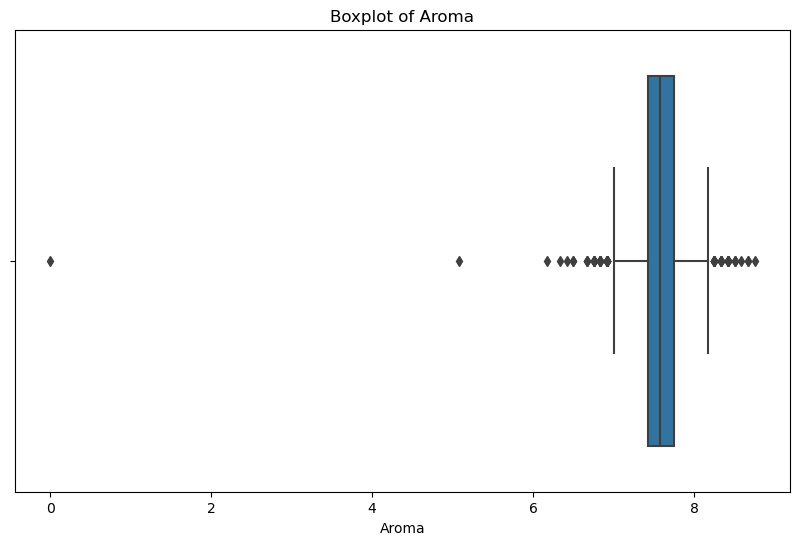

In [366]:
analyze_column(coffee_data_cleaned_harvest_copy, 'aroma')

2. From what we can see above it shows that most ratings of the aroma are relatively high with mean 7.56 which means most rating were between 7 and 8. The range of 8.75 comes from the fact that the max rating given was 8.75 and the min is an outlier 0.0 (can be seen in the boxplot. This could be a mistake, but still it's considered a number and not a missing data(NaN), so it plays a role in the range of the data). The histogram shows a right-skewed distribution which supports the fact that most ratings are relatively high, with fewer lower ratings. The boxplot shows several outliers at the lower end (rating of 0, which could be a potential error).The interquartile range is small so the 50% of the data is tightly grouped.

3. After looking more into the outlier to find whether it's an error i saw that every column in that row (1311) was with value 0.0 For the purpose of the better analysis of the rest of the columns and a new analysis for this one I will remove the row with 0.0 values.

In [367]:
coffee_data_cleaned_zero_row = coffee_data_cleaned_harvest_copy[coffee_data_cleaned_harvest_copy['aroma'] != 0.0]

4. Now will analyse aroma again and then I will continue forward

Mean of Aroma: 7.571801096319499
Range of Aroma: 3.67


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


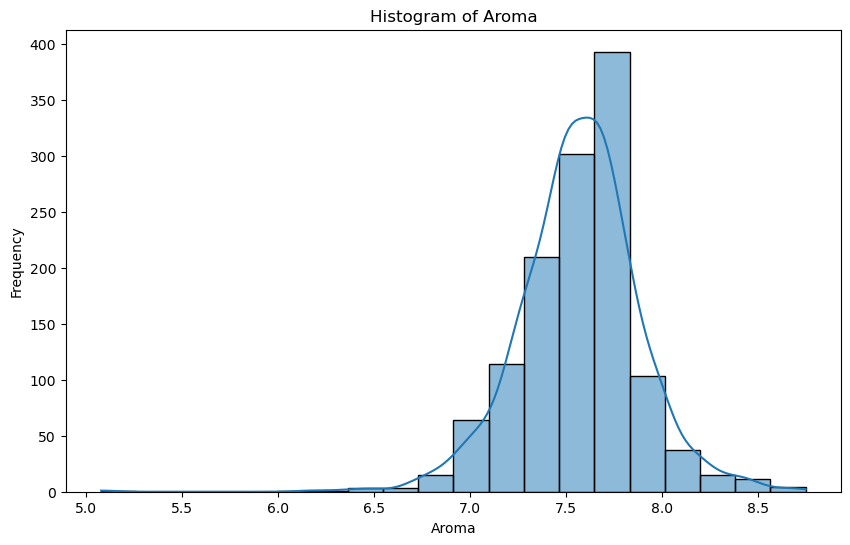

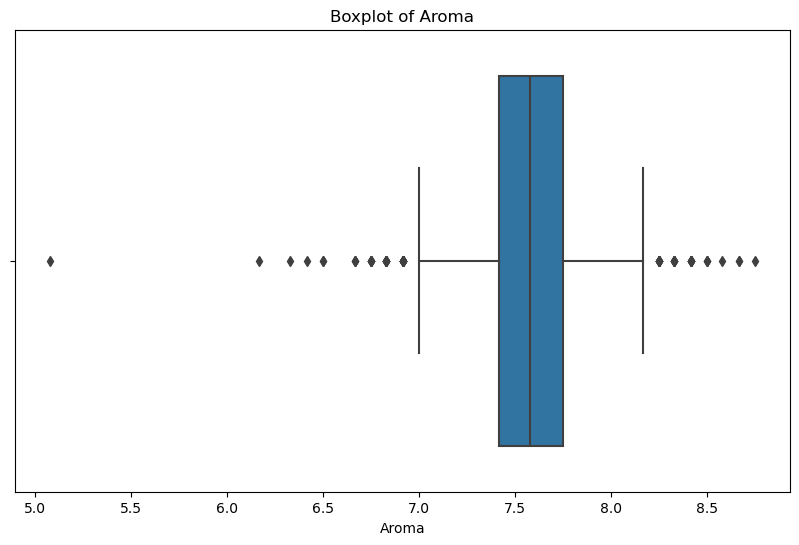

In [369]:
analyze_column(coffee_data_cleaned_zero_row, 'aroma')

5. As it can be seen this made a difference. Not a big difference in the mean which means that it wasn't that affected by the outlier as the previous was 7.56 now it's 7.57 which still supports the fact that most ratings are relatively high. The range on the other side is highly affected now being 3.67(8.5 before). This now shows that there is still some variability in the aroma ratings, but it is more focused around higher values after removing the outlier.The histogram shows that the majority of aroma ratings are concentrated between 7.0 and 8.0, with a peak around 7.5 to 8.0. The distribution is slightly right-skewed, indicating that while most ratings are high, there are some lower ratings, but these are relatively few. The boxplot again indicates that the IQR taht represents the middle 50% is quite narrow. There are still some outliers but they are in a more reasonable range from 5.5 to 6.5. In conclusion the aroma ratings are quite high with central tendency being quite strong around higher values.
6. Now onto the next column Flavor

Mean of Flavor: 7.524001566170712
Range of Flavor: 2.75


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


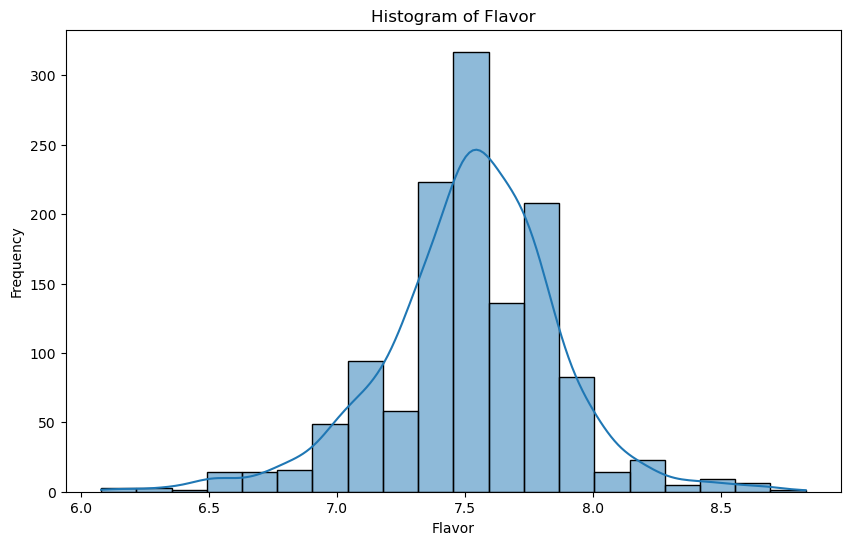

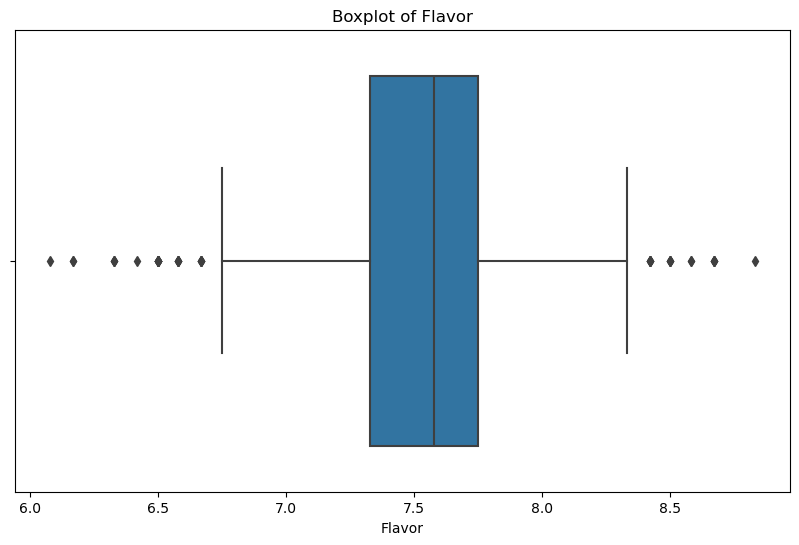

In [370]:
analyze_column(coffee_data_cleaned_zero_row, 'flavor')

7. The mean is quite high 7.524, suggesting most flavors have good rating. Range is 2.75 which indicates some variability but not a very wide spread. The histogram shows quite normal distribution with peak around the mean value. Most values are between 7 and 8. The boxplot shows that there are some outliers on both sides, especialy on the lower side but they are in a reasonable range which means that some flavor scores are lower than the majority
8. Onto the next one Aftertaste

Mean of Aftertaste: 7.402670321064996
Range of Aftertaste: 2.5


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


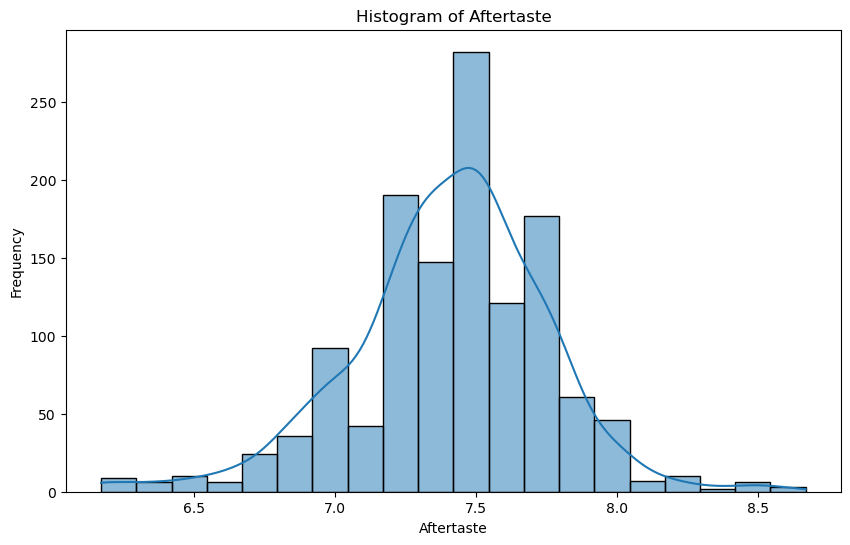

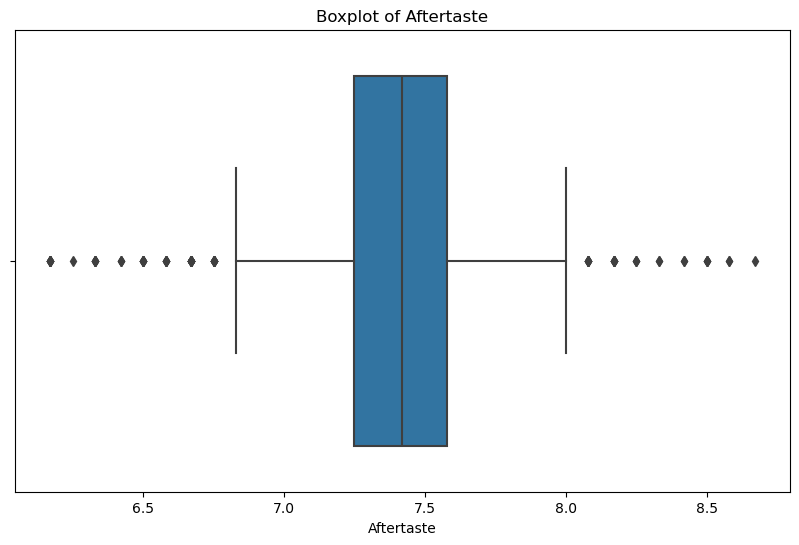

In [371]:
analyze_column(coffee_data_cleaned_zero_row, 'aftertaste')

9. The aftertaste column shows similar values as the previous two with mean around 7.4 which indicates a higher rating, range from 2.5 which means the spread ain't big. The histogram shows a cluster around the mean(bell shaped). The skew shows fewer lower rating samples. The boxplot again has some outliers but are in a reasonable range.
10. Now onto the next Acidity

Mean of Acidity: 7.540783085356304
Range of Acidity: 3.5


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


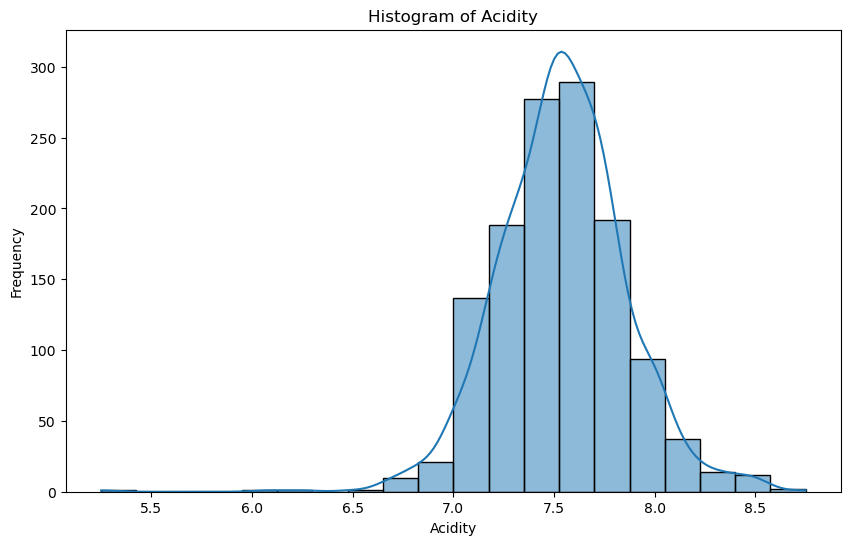

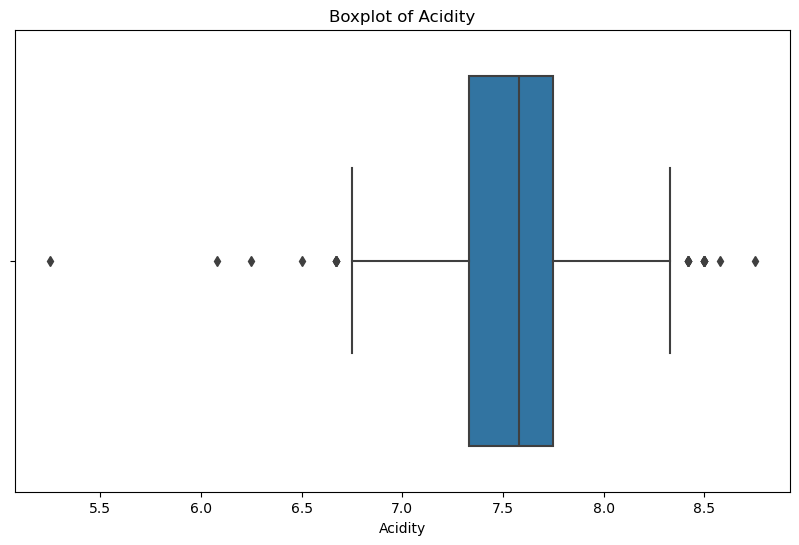

In [372]:
analyze_column(coffee_data_cleaned_zero_row, 'acidity')

11. Again the ratings seem to be similar to the previous columns for now showing a pattern of ratings around 7.5(between 7 and 8). Here again the distribution is normal around the mean. The range is a little bit higher showing more variety but still the majority is between 7 and 8. The boxplot shows some outliers on both ends higher and lower end. Few samples are below 6 and other are above 8.5.
12. Now the next column body

Mean of Body: 7.519561472200469
Range of Body: 3.5


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


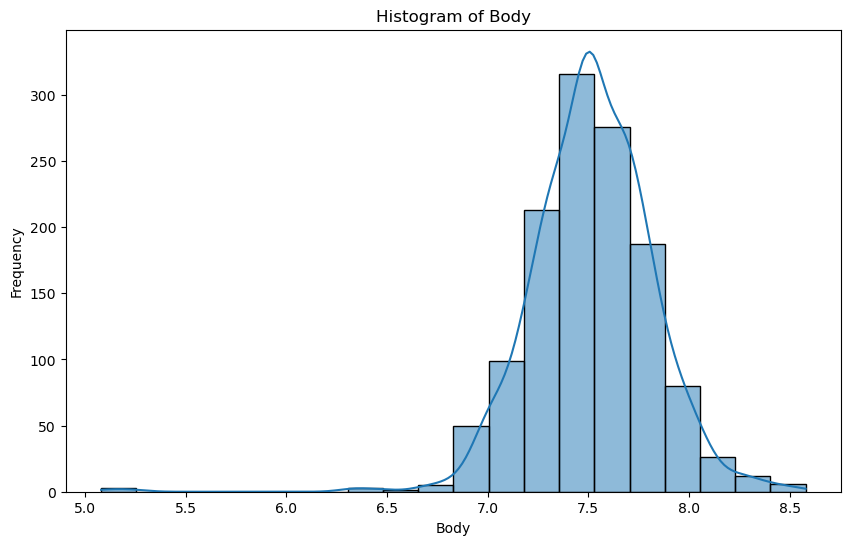

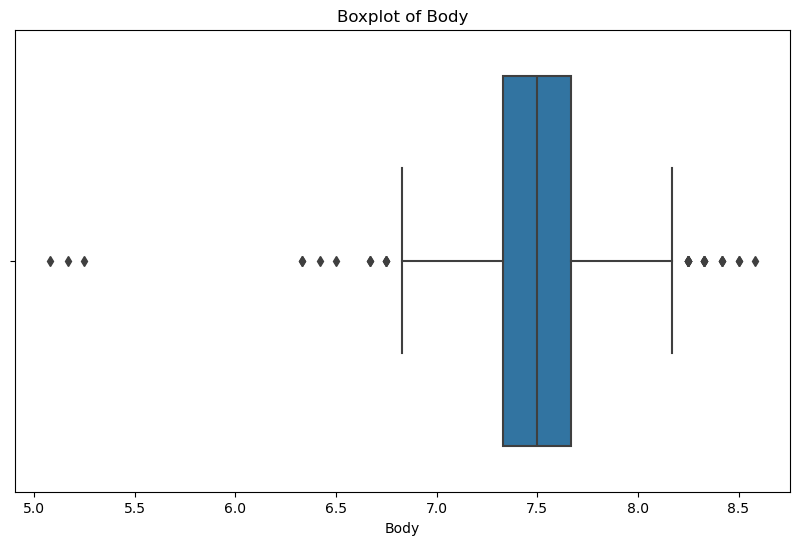

In [374]:
analyze_column(coffee_data_cleaned_zero_row, 'body')

13. The pattern continues with mean of 7.5 and here we also have a higher range as it can be seen in the boxplot there are some outlier values in the low end between 5 and 5.5 but still the majority is in the high end clustered around the mean

Mean of Balance: 7.516006264682851
Range of Balance: 3.5


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


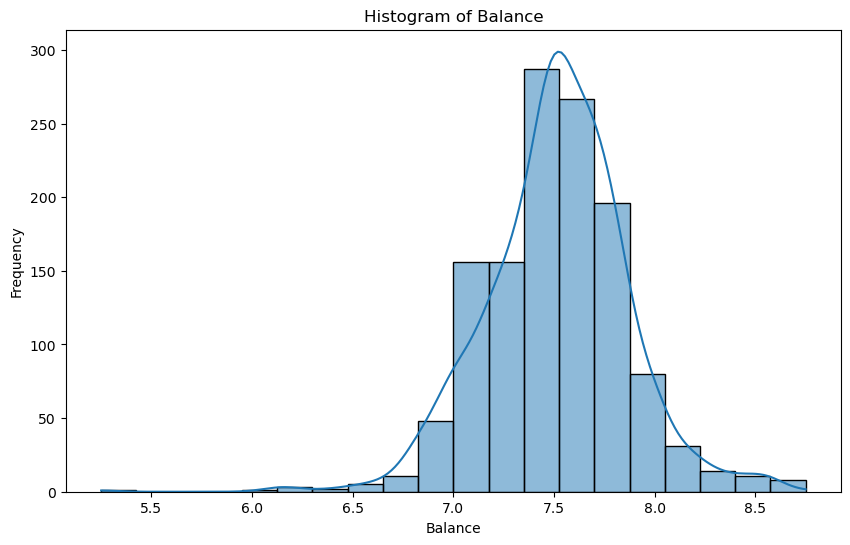

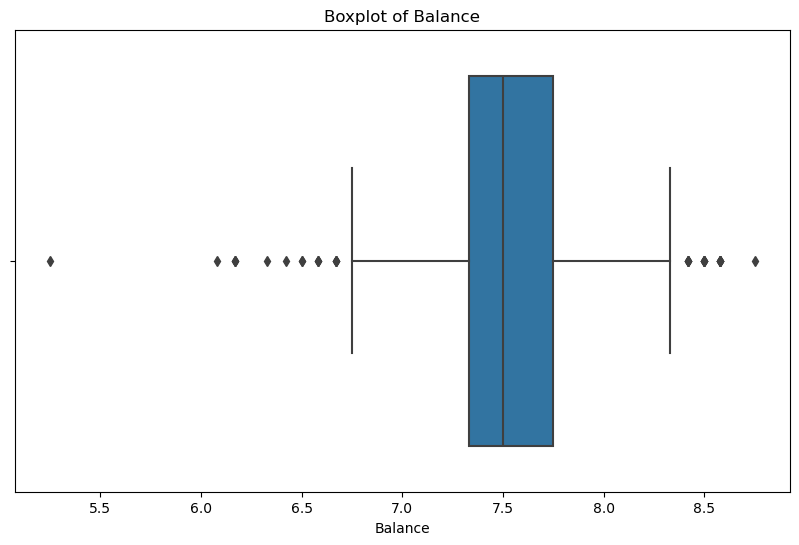

In [375]:
analyze_column(coffee_data_cleaned_zero_row, 'balance')

14. The Balance column continues the trend of mean rating 7.5 and a range of 3.5 as there can be seen an outlier below 5.5 that indicates a rating in lower end but again most are between 7 and 8
15. Now let's see the uniform column

Mean of Uniformity: 9.846319498825371
Range of Uniformity: 4.0


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


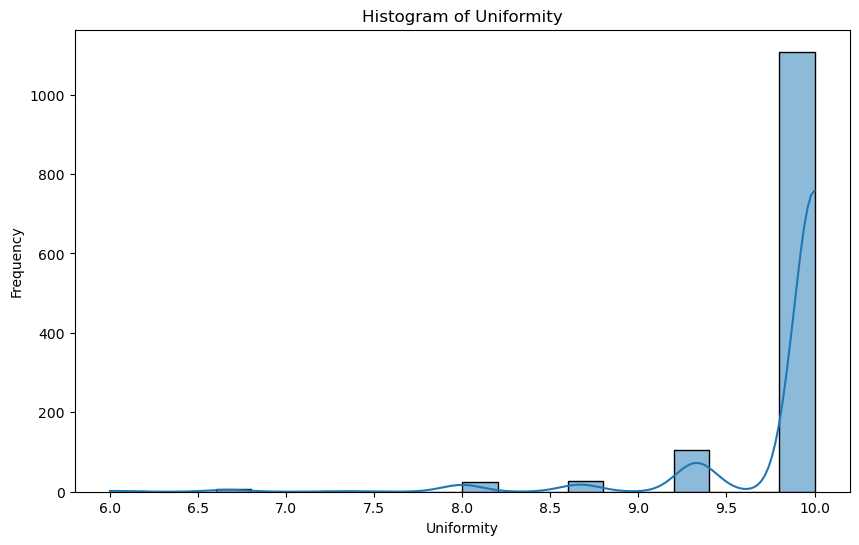

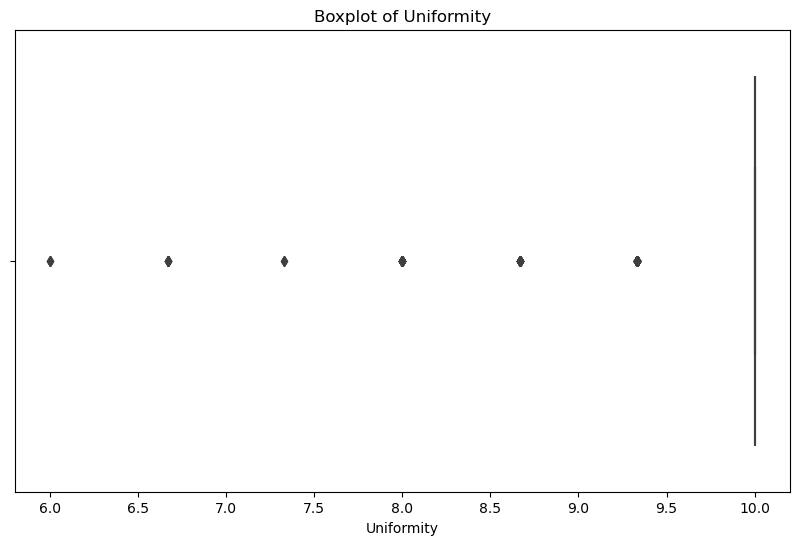

In [376]:
analyze_column(coffee_data_cleaned_zero_row, 'uniformity')

16. The uniformity column did break the trendline until now with mean value of 9.85, which indicates really high ratings and range of 4 which is similar and having in mind the high end and the low end it makes sense (10 to 6).The histogram is heavily skewed to the right, with a significant spike at 10. This is different from other columns where the distributions were more bell-shaped or normal. The histogram shows that the majority of ratings are clustered at the maximum value. The boxplot shows that the interquartile range (IQR) is very narrow and close to 10, indicating minimal variation among most of the ratings. The outliers, while present, are not enough to shift the central tendency away from the maximum score significantly.
17. Let's see the clean cup column now

Mean of Clean_cup: 9.841738449490993
Range of Clean_cup: 10.0


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


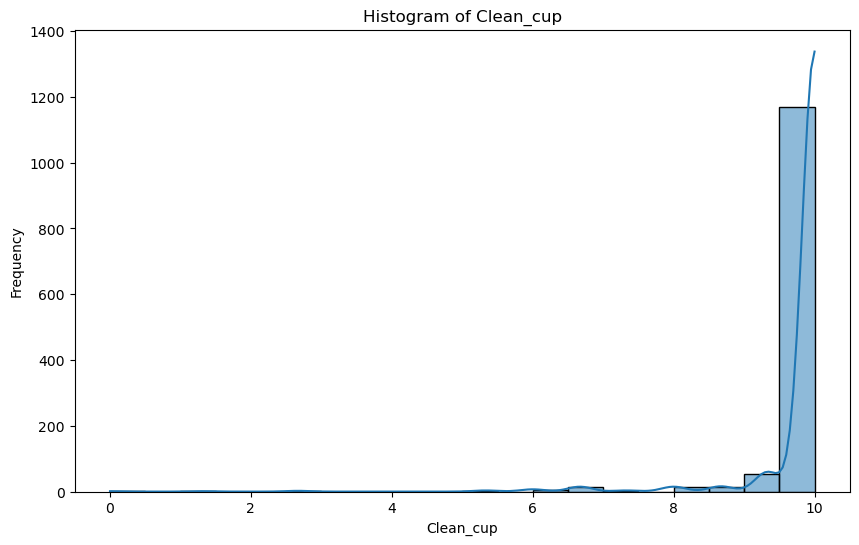

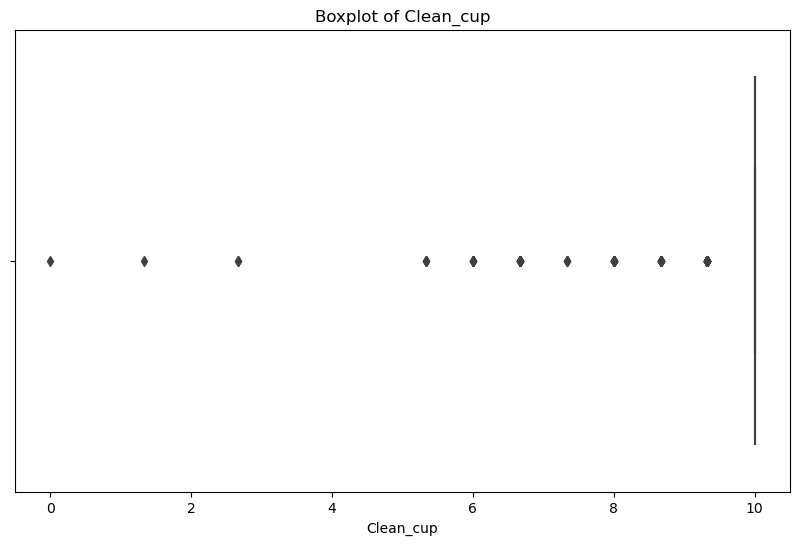

In [380]:
analyze_column(coffee_data_cleaned_zero_row, 'clean_cup')

18. Here the mean rating again is in the higher end indicating on average a high rating. The range of 10 is because the highest is 10 and the lowest rating is 0(which could be an error but it's not a missing value). But there are also some ratings around 2 and 4 indicating that there are rating in the really low end which also means the rating 0 could be valid. But even with that most ratings are clustered around 10.
19. Now let's see sweetness column

Mean of Sweetness: 9.862286609240407
Range of Sweetness: 8.67


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


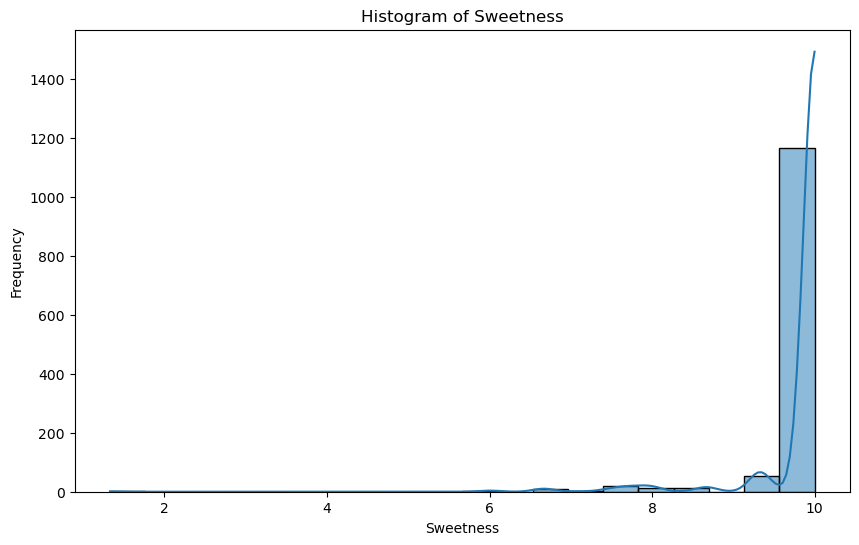

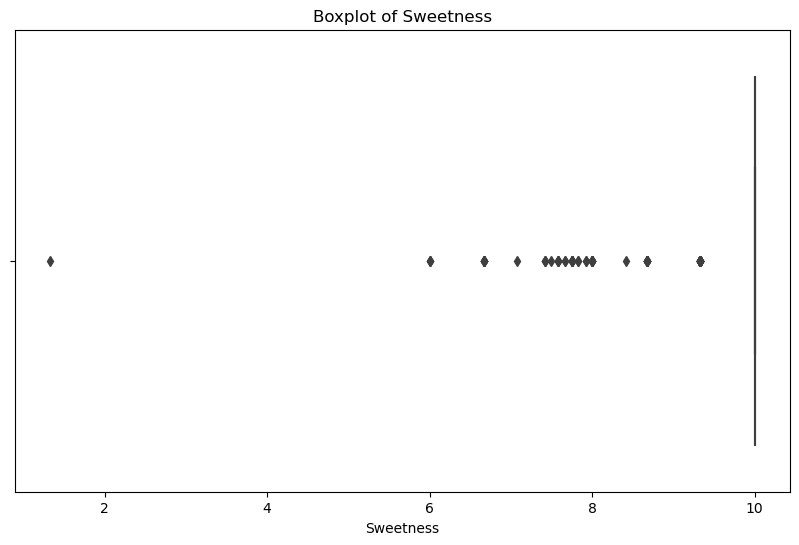

In [381]:
analyze_column(coffee_data_cleaned_zero_row, 'sweetness')

20. The mean here is again very high close to the max and the range also is high indicating a wide spread with values around 6 to 9 and even some below 2, but despite that most are in the higher end. In the first several column there was a tendencty of rating around 7.5 with not that much spread, the recent columns have a tendency of high rating around 10 but a wide range as there are also some really low values that change the spread. But in both cases most values are concetrated on one either 10 or 7.5
21. Now let's continue with the last ones to make some sort of conclison

Mean of Cupper_points: 7.502482380579481
Range of Cupper_points: 4.83


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


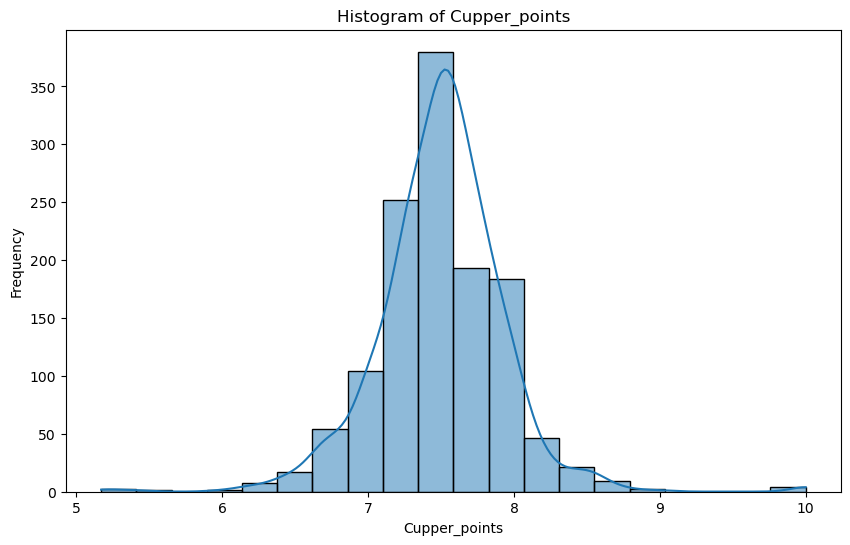

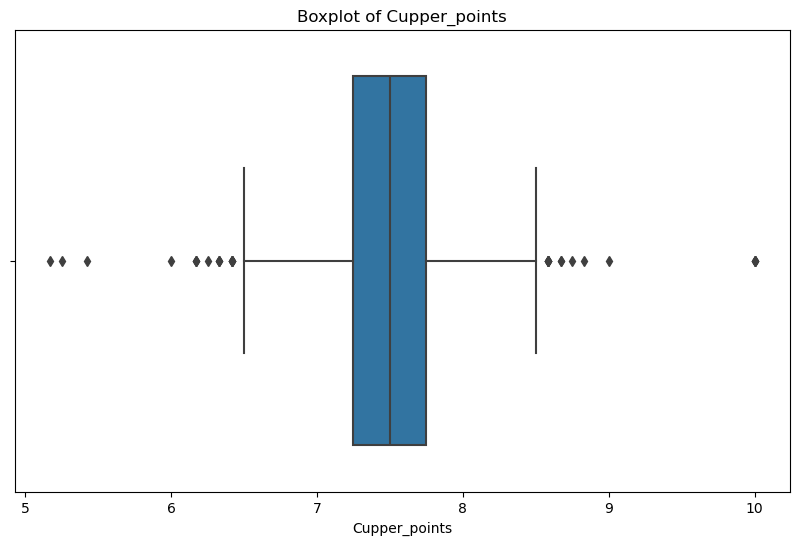

In [382]:
analyze_column(coffee_data_cleaned_zero_row, 'cupper_points')

21. And now the column for cupper points brings us back to the mean value of 7.5 with a roughly normal bell shaped distribution centered around the mean, most ratings are between 7 and 8 and few below 6 and above 9 which make the range relatively bigger but still closer to the other ones with mean 7.5.
22. Now let's get to the final column that is the sum of all points above that and see what conclusion we can make

Mean of Total_cup_points: 82.12790133124511
Range of Total_cup_points: 30.75


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


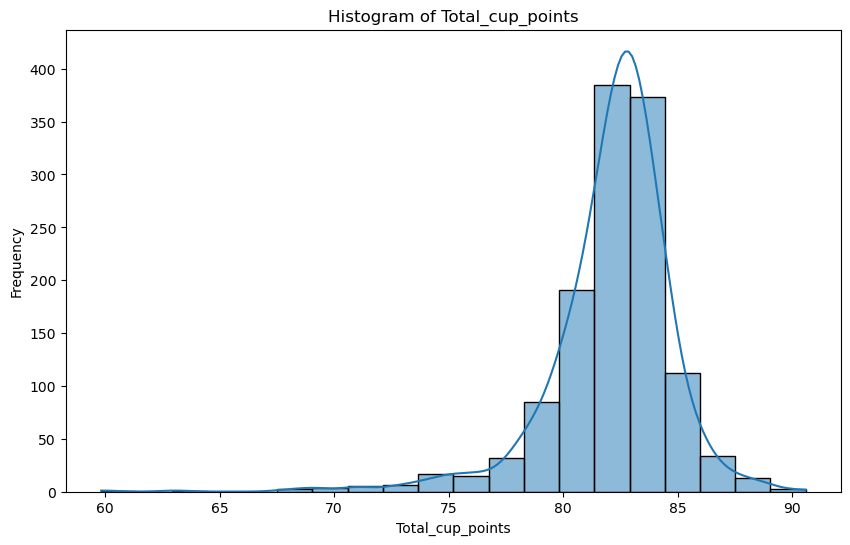

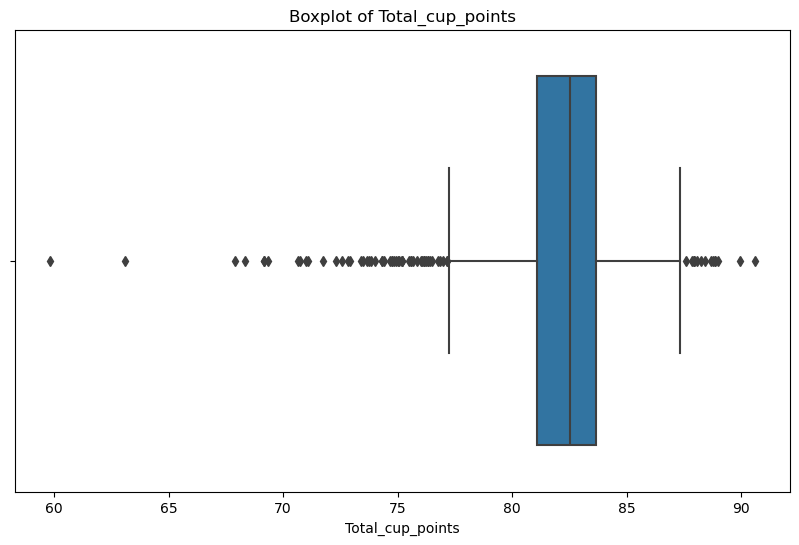

In [383]:
analyze_column(coffee_data_cleaned_zero_row, 'total_cup_points')

23. The toatal cup points shows similar signs to most other columns with right skewed distribution, relatively high mean rating. A spread taht indicates the presence of some lower rated samples, but still the most are in the higher end. Again the distribution is normal.
24. All of the columns show that the majority of the coffee samples are rated high quality across almost all atrributes. Atrributes like uniformity and clean cup show very high and consintent ratings. Despite the high ratings there is some variability in the ratings, but mostly they are high. Most attributes display right-skewed distributions, which is typical in quality rating datasets where most samples are expected to be of good quality, with fewer poor samples.

25. In conclusion the coffee ratings for most coffees are high and are clustered around 7 and 8 with some attributes being the max 10. There are some exceptions and lower ratings(caused by errors or just given a lower rating), but they are not that much. The interesting thing is the rating between 7 and 8 and the consistent 10's. We can assume that the 7.5 rating is a result of people's "golden middle" mindset as most people give 7 to something they don't dislike but don't know what rating to give aswell. But these are just my assumptions. In general the right skewness and the high mean show high quality of coffee

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

1. I will begin by pairing the columns into a seperate csv so that I can also look at it on my own and i will remove the duplicates to make things a bit cleaner and will sort it by country to have some consistency

In [394]:
country_region_pairs = coffee_data_cleaned_harvest_copy[['country_of_origin', 'region', 'altitude','company']].drop_duplicates().sort_values(by='country_of_origin')
country_region_pairs.to_csv('Data/unique_country_region_pairs1.csv', index=False)

In [400]:
country_region_pairs

,country_of_origin,region,altitude,company
480,Brazil,south of minas,905,ipanema coffees
512,Brazil,sul de minas,1250,exportadora de cafés carmo de minas ltda
157,Brazil,mountains of minas gerais,1100m,nucoffee
156,Brazil,vale da grama,1300m,nucoffee
543,Brazil,cerrado,11000 metros,expocaccer
...,...,...,...,...
554,Vietnam,don duong,1040m,royal base corporation
502,Vietnam,vietnam cau dat,1550,"sunvirtue co., ltd."
860,Vietnam,vietnam,1040,"sunvirtue co., ltd."
1338,Vietnam,NaN,NaN,cafe politico


2. Even from first sight from this simple data head it can be seen that the altitude column is not clean. Values vary a lot. The column isn't normalized.Here we can see single number values ex(925), a mixed number and string for unit (1100m), other mixed number string but with units in full words (11 000 metros,"supposedly this is in Portugese as country is Brazil,but that doesn't matter"). We can also see ranges like (1000-1500m) and last but not least(for this head of data that we see) there are NaN values that give no actual information and serve no purpose in the column others are probably a human error or a typo. This is just from here i will see the unique values to get more in depth info of what other values are in it

In [398]:
coffee_data_cleaned_harvest_copy.altitude.unique()

array(['1950-2200', '1800-2200', nan, '1570-1700', '1795-1850',
       '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1450', '1700-2000m',
       'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1200m', '350',
       '1450 msnm

3. As it can be seen there are many many different formats of values. The "cleaned" altitude data shows significant inconsistencies, including mixed units, textual descriptions, ranges, special characters, and possible errors. Proper cleaning should address these issues by standardizing units, converting ranges to a single value , handling textual descriptions appropriately(extracting the number if possible),removing special characters, and correcting or removing outliers and erroneous values. There is a lot of work to be done until this column is clean.
4. Now i will look more deeply into the countries and regions and companies to see wheter there are any problems by beginning with seeing whether there are missing values

In [405]:
coffee_data_cleaned_harvest_copy.region.value_counts(dropna = False)

region
huila                            105
oriente                           80
south of minas                    68
kona                              53
NaN                               41
                                ... 
altotonga                          1
aceh gayo                          1
mbale                              1
blend                              1
kwanza norte province, angola      1
Name: count, Length: 349, dtype: int64

5. As it can be seen there are 41 missing values, but this is not that bad. Some regions are written in two different languages(south of minas and sol de minas), others are too descriptive, but these cannot be errors as they do state the region and the thing we need to look at is whether that region is in the country. Let's now see if the regions are in these countries and wheter there is a region that is linked with more than one country

In [403]:
country_region_counts = country_region_pairs.groupby(['country_of_origin', 'region']).size().reset_index(name='count')

# Identify regions associated with multiple countries
regions_multiple_countries = country_region_counts.groupby('region').filter(lambda x: x['country_of_origin'].nunique() > 1)
regions_multiple_countries 

,country_of_origin,region,count
20,China,menglian,1
24,Colombia,antioquia,2
43,Costa Rica,occidental,1
85,Guatemala,jalapa,2
95,Guatemala,san marcos,4
110,Honduras,occidental,1
112,Honduras,san marcos,3
116,India,chikmagalur,4
189,Mexico,menglian,1
246,Nicaragua,jalapa,1


6. As we can see there are some regions that are linked with more than one country. For example menglian region is linked with both China and Mexico and so on. US shares same regions as Colombia and India.
7. Now let's see whether there are errors in the companies and whether there is one on one link between company and country.

In [414]:
coffee_data_cleaned_harvest_copy.company.value_counts(dropna = False)

company
NaN                               158
unex guatemala, s.a.               86
ipanema coffees                    50
racafe & cia s.c.a                 40
exportadora de cafe condor s.a     40
                                 ... 
ecom cca s.a.                       1
hacienda la esmeralda               1
finca kassandra                     1
nitin coffee estate                 1
global opportunity fund             1
Name: count, Length: 280, dtype: int64

8. There are 158 missing values. But let's see if companies are one on one with the countries.

In [409]:
country_company_counts = country_region_pairs.groupby(['country_of_origin', 'company']).size().reset_index(name='count')

# Identify companies associated with multiple countries
companies_multiple_countries = country_company_counts.groupby('company').filter(lambda x: x['country_of_origin'].nunique() > 1)

In [410]:
companies_multiple_countries

,country_of_origin,company,count
2,Brazil,cafe politico,1
9,Brazil,green mountain coffee,1
15,Burundi,the specialty coffee appraisers institute of asia,1
22,Colombia,cafe politico,1
26,Colombia,costco wholesale industries,1
29,Colombia,essence coffee,1
32,Colombia,green mountain coffee,1
33,Colombia,lusso coffee lab,1
35,Colombia,olam specialty coffee,1
38,Colombia,the coffee source inc.,2


9. Turns out they are not, but is this an error? If it's a big company that buys and resells coffe worldwide it's normal for many countries to work with that distributor, for example lusso coffee lab is a big distributor of coffee from the whole world so it's logical for more than one country to be associated with it(and i checked the data and the regions seem legit and valid,every region is for the country of origin), but this can only be an excuse for part of the entries. Part of them are a little bit suspicious like Burundi and Ethiopia being linked with the association of coffee of Asia, but after checking the regions and all it seems good. And more the Coffemakers, llc. United States and India sharing the same company looked a bit suspicious for me so i checked it and the only entry of that company associated with the US is the entry with an error in it's region US(chikmagalur), and the other olam specialty coffee is linked with a region in Indonesia. Cafe POLITICO is linked with many countries, but no country has a region from where the coffee is from,that's suspicious. In many cases if one company is linked with many countries, these countries don't have a region of the coffee, which again looks a bit off.

10. Here I am coming to a conclusion that all of the UNITED STATES only entries(Not those with hawaii and Puerto Rico) are errors as the regions that the country is linked to aren't in amerika, but in India and Indonesia

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!